# **Data Science II CoderHouse [Comisión #67485]**

## **Alumno:** Daniel Kresisch

## **Presentación del proyecto**

###**Abstracto con motivación de audiencia**

En un entorno digital cada vez más exigente, las empresas deben anticiparse a la demanda del mercado para optimizar recursos y aumentar su competitividad. Este proyecto de Data Science tiene como objetivo predecir las ventas de **Digital Soluciones S.A.** mediante técnicas de Machine Learning, con el fin de mejorar la planificación logística, comercial y financiera.

El proyecto está dirigido a quienes toman decisiones en áreas como marketing, ventas y dirección general, y buscan aplicar modelos predictivos respaldados por datos concretos y experiencia operativa, para impulsar la eficiencia y fortalecer la estrategia de negocio.

###**Contexto comercial y contexto analítico**

####Contexto comercial:
Digital Soluciones S.A. vende ropa, libros, electrónica y artículos para el hogar en varios países (España, Argentina, Brasil, Colombia, entre otros). Atiende clientes de distintos perfiles y regiones, lo que dificulta analizar su comportamiento de compra. Por ello, necesita herramientas predictivas para optimizar su inventario, campañas y estrategias regionales.

####Contexto analítico:
El dataset, extraído de la plataforma Kaggle, incluye pedidos con variables como fecha, país, ciudad, producto, categoría, cantidad, precio, descuento, pago, envío y totales de venta. Se usará un enfoque supervisado para estimar el monto total (Precio_Total), considerando patrones temporales, demográficos y comerciales, con el fin de construir un modelo predictivo confiable.

### **Preguntas a resolver mediante el Análisis de Datos**

###  1. ¿Cuáles son los métodos de pago más utilizados por los clientes?


### 2. ¿Qué productos tienen más descuentos?

### 3. ¿Cuáles son los productos más vendidos?

### 4. ¿Hay mucha demora en el envío?

### 5. ¿Cuáles son los meses donde hay más ventas?

###**Objetivo general del proyecto**


El principal objetivo es construir un modelo predictivo que nos permita estimar el valor total de una venta (Precio_Total). A partir de las características del cliente, el producto y la operación, este modelo servirá como una herramienta valiosa de planificación para las áreas de ventas y logística, ayudando a optimizar recursos y a tomar decisiones más informadas.

####Tipo de modelo a utilizar
Para este proyecto se va a utilizar la regresión lineal. Es un modelo supervisado, simple y lo más importante, altamente interpretable. La regresión lineal permitirá entender de manera clara y directa cómo cada variable influye en el precio final de la venta. Además, servirá como un excelente punto de partida (o línea base), con la cual se podrá comparar la efectividad de modelos más complejos en el futuro si fuera necesario.

####Variables clave

Las variables que se utilizarán para construir el modelo son:

* **Variables numéricas:** Edad, Precio_Unitario, Cantidad, Descuento y Días_de_envío.

* **Variables categóricas:** País, Ciudad, Género, Categoría y Subcategoría del producto, y Método_de_pago. Estas variables serán procesadas y transformadas para que puedan ser utilizadas en el modelo.

* **Variable de tiempo:** Fecha_Pedido, que será transformada para capturar la estacionalidad (por ejemplo, el día de la semana o el mes).

## **Presentación ejecutiva**

[Ver la presentación ejecutiva](https://drive.google.com/file/d/1T0PxN1H6CyY-4UzhaO0HkFvijD7lsU6C/view)

## **Lectura de datos**

---



In [ ]:
# Importación de las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Para que Python no muestre errores
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Conexión con Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Ubicación del dataset
%cd '/content/gdrive/MyDrive/Coderhouse/Data Science II/Desafios/Proyecto final'

/content/gdrive/MyDrive/Coderhouse/Data Science II/Desafios/Proyecto final


In [ ]:
# Lectura del dataset
df = pd.read_excel ('Digital_Soluciones.xlsx')

In [ ]:
# Primeros 5 registros
df.head()

,ID_Pedido,ID_Cliente,Nombre_Cliente,Género,Edad,País,Ciudad,ID_Producto,Nombre_Producto,Categoría,Subcategoría,Precio_Unitario,Cantidad,Descuento,Precio_Total,Fecha_Pedido,Método_Pago,Días_Envío
0,P-100000,C-6342,Samantha Davila,Otro,39,España,Valencia,PR-977,Jeans,Ropa,Jeans,785.26,2,0.09,1429.17,2025-03-04 00:00:00,Contra Reembolso,8.0
1,P-100001,C-4192,Jacob Burns,Femenino,43,España,Madrid,PR-143,Muebles,Hogar,Muebles,376.62,1,0.13,327.66,2024-03-03 00:00:00,Tarjeta de Crédito,10.0
2,P-100002,C-9546,Denise Bullock,Masculino,65,España,Barcelona,PR-857,Ficción,Libros,Ficción,94.64,5,0.06,444.81,2023-10-14 00:00:00,Transferencia Bancaria,2.0
3,P-100003,C-6072,Erin Jones,Femenino,48,Colombia,Medellín,PR-266,Tablet,Electrónica,Tablet,966.04,1,0.27,705.21,2024-11-02 00:00:00,Contra Reembolso,10.0
4,P-100004,C-5199,Shawn Reed,Femenino,36,España,Valencia,PR-151,Cómics,Libros,Cómics,722.05,3,0.22,1689.60,2024-01-20 00:00:00,Transferencia Bancaria,6.0


In [ ]:
# Últimos 5 registros
df.tail()

,ID_Pedido,ID_Cliente,Nombre_Cliente,Género,Edad,País,Ciudad,ID_Producto,Nombre_Producto,Categoría,Subcategoría,Precio_Unitario,Cantidad,Descuento,Precio_Total,Fecha_Pedido,Método_Pago,Días_Envío
10001,P-200002,NaN,,NaN,28,Chile,Santiago,PR-002,NaN,Ropa,Remera,NaN,3,0.15,892.25,NaN,NaN,NaN
10002,P-106252,C-8579,Carmen Jones,Femenino,42,Argentina,Buenos Aires,PR-908,Jeans,Ropa,Jeans,326.28,5,0.28,1174.61,2024-03-11 00:00:00,Transferencia Bancaria,7.0
10003,P-104684,C-5038,Mary Welch,Femenino,36,España,Barcelona,PR-273,Tablet,Electrónica,Tablet,42.67,3,0.17,106.25,2023-07-24 00:00:00,Tarjeta de Crédito,9.0
10004,P-101731,C-1503,Donna Jackson,Otro,23,España,Barcelona,PR-617,Decoración,Hogar,Decoración,148.55,5,0.05,705.61,2024-06-27 00:00:00,Transferencia Bancaria,1.0
10005,P-200003,c-7777,juan perez,Masculin,treinta,Brasil,rio de janeiro,pr-888,Tablet,electrónica,tablets,950.00,1,0.10,855.00,2025/06/10,contra reembolso,4.0


In [ ]:
# Registros (filas) y atributos (columnas) que presenta el dataset

df.shape

(10006, 18)

In [ ]:
# Variables del dataset
df.columns

Index(['ID_Pedido', 'ID_Cliente', 'Nombre_Cliente', 'Género', 'Edad', 'País',
       'Ciudad', 'ID_Producto', 'Nombre_Producto', 'Categoría', 'Subcategoría',
       'Precio_Unitario', 'Cantidad', 'Descuento', 'Precio_Total',
       'Fecha_Pedido', 'Método_Pago', 'Días_Envío'],
      dtype='object')

In [ ]:
# Información general de cada variable del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10006 entries, 0 to 10005
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Pedido        10006 non-null  object 
 1   ID_Cliente       10005 non-null  object 
 2   Nombre_Cliente   10005 non-null  object 
 3   Género           10005 non-null  object 
 4   Edad             10005 non-null  object 
 5   País             10006 non-null  object 
 6   Ciudad           10005 non-null  object 
 7   ID_Producto      10006 non-null  object 
 8   Nombre_Producto  10005 non-null  object 
 9   Categoría        10006 non-null  object 
 10  Subcategoría     10006 non-null  object 
 11  Precio_Unitario  10005 non-null  float64
 12  Cantidad         10006 non-null  int64  
 13  Descuento        10006 non-null  float64
 14  Precio_Total     10005 non-null  float64
 15  Fecha_Pedido     10005 non-null  object 
 16  Método_Pago      10005 non-null  object 
 17  Días_Envío  

### **Variables**

Para comprender mejor los datos es necesario conocer la descripción de cada variable del dataset:

- **ID_Pedido**: El número de identificación de cada pedido.

- **ID_Cliente**: El número de identificación de cada cliente.

- **Nombre_Cliente**: EL nombre completo de cada cliente.

- **Género**: El género declarado por el cliente.

- **Edad**: La edad del cliente al momento de realizar el pedido.

- **País**: El país desde donde se efectuó la compra.

- **Ciudad**: La ciudad en la que reside el cliente.

- **ID_Producto**: El número de identificación del producto vendido.

- **Nombre_Producto**: El nombre del producto vendido.

- **Categoría**: La clasificación general del producto.

- **Subcategoría**: Una categoría más específica del producto.

- **Precio_Unitario**: El precio del producto por unidad antes de aplicar descuentos.

- **Cantidad**: El número de unidades vendidas del producto en un mismo pedido.

- **Descuento**: El descuento aplicado al pedido.

- **Precio_Total**: El monto final pagado por el cliente.

- **Fecha_Pedido**: La fecha en la que se realizó la venta.

- **Método_Pago**: El medio de pago utilizado por el cliente.

- **Días_Envío**: La cantidad de días que transcurrieron entre la venta y la entrega.

In [ ]:
# Exploración de la información
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Precio_Unitario,10005.0,505.524064,285.417597,10.02,258.09,503.14,752.71,999.82
Cantidad,10006.0,3.004297,1.419463,1.00,2.00,3.00,4.00,5.00
Descuento,10006.0,0.150357,0.087522,0.00,0.07,0.15,0.23,0.30
Precio_Total,10005.0,1292.228013,1027.877070,8.20,471.12,1003.61,1904.45,4929.66
Días_Envío,10005.0,5.517841,2.855476,1.00,3.00,6.00,8.00,10.00


In [ ]:
# Resumen estadístico de columnas categóricas
df.describe(include=['object']).T

,count,unique,top,freq
ID_Pedido,10006,10003,P-106252,2
ID_Cliente,10005,5971,C-3788,7
Nombre_Cliente,10005,9396,Richard Smith,8
Género,10005,4,Masculino,3441
Edad,10005,54,27,217
País,10006,6,México,2108
Ciudad,10005,16,Ciudad de México,724
ID_Producto,10006,903,PR-529,22
Nombre_Producto,10005,13,Remera,881
Categoría,10006,5,Ropa,2518


In [ ]:
# Estadísticas descriptivas de las variables numéricas
print(df.describe(include=[np.number]))

       Precio_Unitario      Cantidad     Descuento  Precio_Total    Días_Envío
count     10005.000000  10006.000000  10006.000000  10005.000000  10005.000000
mean        505.524064      3.004297      0.150357   1292.228013      5.517841
std         285.417597      1.419463      0.087522   1027.877070      2.855476
min          10.020000      1.000000      0.000000      8.200000      1.000000
25%         258.090000      2.000000      0.070000    471.120000      3.000000
50%         503.140000      3.000000      0.150000   1003.610000      6.000000
75%         752.710000      4.000000      0.230000   1904.450000      8.000000
max         999.820000      5.000000      0.300000   4929.660000     10.000000


## **Data Wrangling - Limpieza y transformación de datos**

In [ ]:
# Eliminar las columnas ID_Cliente y ID_Producto ya que no aplican para el proyecto
columnas_a_eliminar = ['ID_Cliente', 'ID_Producto']
df = df.drop(columns=columnas_a_eliminar)
# Conversión de ID_Pedido en index
df = df.set_index('ID_Pedido')
df

,Nombre_Cliente,Género,Edad,País,Ciudad,Nombre_Producto,Categoría,Subcategoría,Precio_Unitario,Cantidad,Descuento,Precio_Total,Fecha_Pedido,Método_Pago,Días_Envío
ID_Pedido,,,,,,,,,,,,,,,
P-100000,Samantha Davila,Otro,39,España,Valencia,Jeans,Ropa,Jeans,785.26,2,0.09,1429.17,2025-03-04 00:00:00,Contra Reembolso,8.0
P-100001,Jacob Burns,Femenino,43,España,Madrid,Muebles,Hogar,Muebles,376.62,1,0.13,327.66,2024-03-03 00:00:00,Tarjeta de Crédito,10.0
P-100002,Denise Bullock,Masculino,65,España,Barcelona,Ficción,Libros,Ficción,94.64,5,0.06,444.81,2023-10-14 00:00:00,Transferencia Bancaria,2.0
P-100003,Erin Jones,Femenino,48,Colombia,Medellín,Tablet,Electrónica,Tablet,966.04,1,0.27,705.21,2024-11-02 00:00:00,Contra Reembolso,10.0
P-100004,Shawn Reed,Femenino,36,España,Valencia,Cómics,Libros,Cómics,722.05,3,0.22,1689.60,2024-01-20 00:00:00,Transferencia Bancaria,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P-200002,,NaN,28,Chile,Santiago,NaN,Ropa,Remera,NaN,3,0.15,892.25,NaN,NaN,NaN
P-106252,Carmen Jones,Femenino,42,Argentina,Buenos Aires,Jeans,Ropa,Jeans,326.28,5,0.28,1174.61,2024-03-11 00:00:00,Transferencia Bancaria,7.0
P-104684,Mary Welch,Femenino,36,España,Barcelona,Tablet,Electrónica,Tablet,42.67,3,0.17,106.25,2023-07-24 00:00:00,Tarjeta de Crédito,9.0


### Valores Duplicados

In [ ]:
# Identificar valores duplicados
duplicados = df.duplicated()
print (f"duplicados encontrados: {duplicados.sum()}")

duplicados encontrados: 3


In [ ]:
# Eliminar duplicados y filas vacías
df = df.drop_duplicates()
df = df.dropna(how='all')

In [ ]:
# Verificar que no quedaron valores duplicados
duplicados = df.duplicated()
print (f"duplicados encontrados: {duplicados.sum()}")

duplicados encontrados: 0


### Valores nulos

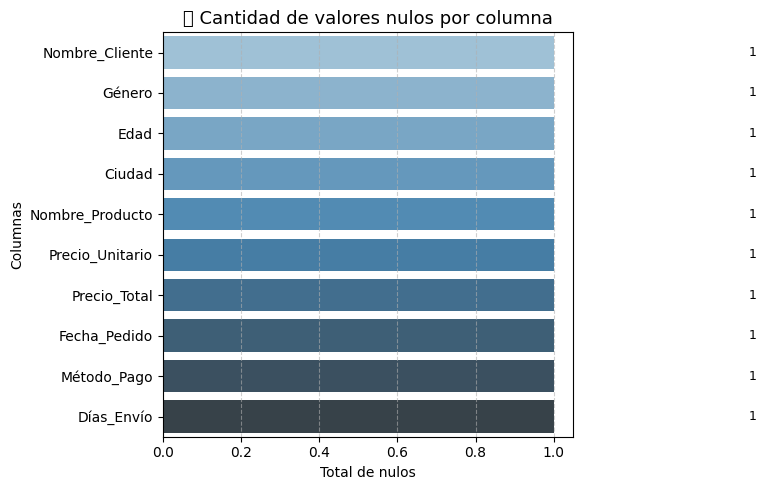

In [ ]:
# Calcular nulos
nulos = df.isnull().sum()
nulos = nulos[nulos > 0].sort_values(ascending=False)

# Gráficar
plt.figure(figsize=(9, 5))
ax = sns.barplot(x=nulos.values, y=nulos.index, palette="Blues_d")

# Mostrar los valores al final de cada barra
for i, v in enumerate(nulos.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontsize=9)

plt.title("📉 Cantidad de valores nulos por columna", fontsize=13)
plt.xlabel("Total de nulos")
plt.ylabel("Columnas")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Se decidió que las variables **categóricas** se van a reemplazar los nulos por la **moda** y las **cuantitativas** por la **media**

In [ ]:
# Lista de columnas a imputar con la moda
columnas_moda = ['Nombre_Cliente', 'Género', 'Ciudad', 'Nombre_Producto', 'Método_Pago']

for col in columnas_moda:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda)

In [ ]:
# Definir columnas a imputar
columnas_media = ['Edad', 'Precio_Unitario', 'Precio_Total', 'Días_Envío']

# Convertir a numérico y reemplazar nulos por la media
for col in columnas_media:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Se convierte la 'Fecha' en formato datetime:
df['Fecha_Pedido'] = pd.to_datetime(df['Fecha_Pedido'], errors='coerce')
# Se calcula la "media" (fecha promedio) de la columna Fecha (ignora nulos)
fecha_media = df['Fecha_Pedido'].mean()

# Reemplazar nulos por esa fecha promedio
df['Fecha_Pedido'] = df['Fecha_Pedido'].fillna(fecha_media)

In [ ]:
# Se verifica que no quedaron valores nulos
print(df.isnull().sum())

Nombre_Cliente     0
Género             0
Edad               0
País               0
Ciudad             0
Nombre_Producto    0
Categoría          0
Subcategoría       0
Precio_Unitario    0
Cantidad           0
Descuento          0
Precio_Total       0
Fecha_Pedido       0
Método_Pago        0
Días_Envío         0
dtype: int64


### Otras transformaciones

In [ ]:
# Se analiza si no hay errores en las columnas categóricas
columnas_categoricas = ['Nombre_Cliente', 'Género', 'País', 'Ciudad', 'Nombre_Producto', 'Categoría', 'Subcategoría', 'Método_Pago']

for col in columnas_categoricas:
    print(f"\n--- Valores únicos en '{col}' ({len(df[col].unique())} únicos) ---")
    print(df[col].value_counts(dropna=False))


--- Valores únicos en 'Nombre_Cliente' (9396 únicos) ---
Nombre_Cliente
Richard Smith       9
Jennifer Johnson    5
Lisa Smith          5
Michael Johnson     5
Mary Jones          4
                   ..
Tyler Conley        1
Michael Burton      1
Mary Stone          1
Stephen Anderson    1
Kim Thompson        1
Name: count, Length: 9396, dtype: int64

--- Valores únicos en 'Género' (4 únicos) ---
Género
Masculino    3442
Otro         3336
Femenino     3224
Masculin        1
Name: count, dtype: int64

--- Valores únicos en 'País' (6 únicos) ---
País
México       2108
Argentina    2000
España       1990
Colombia     1953
Chile        1951
Brasil          1
Name: count, dtype: int64

--- Valores únicos en 'Ciudad' (16 únicos) ---
Ciudad
Ciudad de México    725
Guadalajara         711
Rosario             692
Monterrey           673
Barcelona           672
Medellín            669
Valencia            667
Bogotá              664
Buenos Aires        662
Santiago            658
Valparaíso    

In [ ]:
# Reemplaza 'otro' en la columna Género por el valor más común (moda)
moda_genero = df['Género'].mode()[0]
df['Género'] = df['Género'].replace('otro', moda_genero)

In [ ]:
# Diccionarios con correcciones para cada columna problemática

correcciones_genero = {
    'msculin': 'Masculino',
    'masculino?': 'Masculino',
    'Masculino': 'Masculino',
    'Femenino': 'Femenino'
}

correcciones_nombre_producto = {
    'Camiseta': 'Remera'
}

correcciones_categoria = {
    'electrónica': 'Electrónica'
}

correcciones_subcategoria = {
    'tablets': 'Tablet'
}

correcciones_metodo_pago = {
    'contra reembolso': 'Contra Reembolso'
}

# Aplicar reemplazos en el DataFrame

df['Género'] = df['Género'].str.strip().replace(correcciones_genero)
df['Nombre_Producto'] = df['Nombre_Producto'].str.strip().replace(correcciones_nombre_producto)
df['Categoría'] = df['Categoría'].str.strip().replace(correcciones_categoria)
df['Subcategoría'] = df['Subcategoría'].str.strip().replace(correcciones_subcategoria)
df['Método_Pago'] = df['Método_Pago'].str.strip().replace(correcciones_metodo_pago)


In [ ]:
# Verificar si está todo correcto
columnas_categoricas = ['Nombre_Cliente', 'Género', 'País', 'Ciudad', 'Nombre_Producto', 'Categoría', 'Subcategoría', 'Método_Pago']

for col in columnas_categoricas:
    print(f"\n--- Valores únicos en '{col}' ({len(df[col].unique())} únicos) ---")
    print(df[col].value_counts(dropna=False))


--- Valores únicos en 'Nombre_Cliente' (9396 únicos) ---
Nombre_Cliente
Richard Smith       9
Jennifer Johnson    5
Lisa Smith          5
Michael Johnson     5
Mary Jones          4
                   ..
Tyler Conley        1
Michael Burton      1
Mary Stone          1
Stephen Anderson    1
Kim Thompson        1
Name: count, Length: 9396, dtype: int64

--- Valores únicos en 'Género' (4 únicos) ---
Género
Masculino    3442
Otro         3336
Femenino     3224
Masculin        1
Name: count, dtype: int64

--- Valores únicos en 'País' (6 únicos) ---
País
México       2108
Argentina    2000
España       1990
Colombia     1953
Chile        1951
Brasil          1
Name: count, dtype: int64

--- Valores únicos en 'Ciudad' (16 únicos) ---
Ciudad
Ciudad de México    725
Guadalajara         711
Rosario             692
Monterrey           673
Barcelona           672
Medellín            669
Valencia            667
Bogotá              664
Buenos Aires        662
Santiago            658
Valparaíso    

In [ ]:
# Se dividen la columna de fecha en año, mes, dia, hora, minutos y segundos
df['Año'] = df['Fecha_Pedido'].dt.year
df['Mes'] = df['Fecha_Pedido'].dt.month
df['Día'] = df['Fecha_Pedido'].dt.day
df['Hora'] = df['Fecha_Pedido'].dt.hour
df['Minuto'] = df['Fecha_Pedido'].dt.minute
df['Segundo'] = df['Fecha_Pedido'].dt.second
# Se muestran las primeras 5 filas para verificar que está todo correcto
df[['Fecha_Pedido', 'Año', 'Mes', 'Día', 'Hora', 'Minuto', 'Segundo']].head()

,Fecha_Pedido,Año,Mes,Día,Hora,Minuto,Segundo
ID_Pedido,,,,,,,
P-100000,2025-03-04,2025,3,4,0,0,0
P-100001,2024-03-03,2024,3,3,0,0,0
P-100002,2023-10-14,2023,10,14,0,0,0
P-100003,2024-11-02,2024,11,2,0,0,0
P-100004,2024-01-20,2024,1,20,0,0,0


### Tratamiento de valores outliers

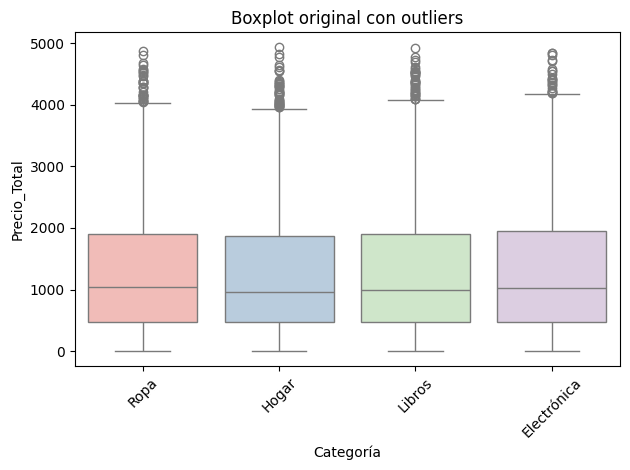

In [ ]:
# Boxplot para ver los outliers
sns.boxplot(data=df, x='Categoría', y='Precio_Total', palette='Pastel1')
plt.title("Boxplot original con outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Función para detectar outlier
def detectar_outliers(grupo, columna='Precio_Total'):
    Q1 = grupo[columna].quantile(0.25)
    Q3 = grupo[columna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return grupo[(grupo[columna] < lim_inf) | (grupo[columna] > lim_sup)]

In [ ]:
# Ver cuantos outlier hay
outliers_antes = df.groupby("Categoría").apply(detectar_outliers).reset_index(drop=True)
print(f"Outliers antes de reemplazar: {len(outliers_antes)}")

Outliers antes de reemplazar: 135


In [ ]:
# Reemplazar los outlier por la mediana
def reemplazar_outliers_iterativo(df, columna='Precio_Total', agrupador='Categoría'):
    df_copia = df.copy()
    outliers_restantes = float('inf')

    while outliers_restantes > 0:
        df_temp = df_copia.copy()

        for categoria, grupo in df_temp.groupby(agrupador):
            Q1 = grupo[columna].quantile(0.25)
            Q3 = grupo[columna].quantile(0.75)
            IQR = Q3 - Q1
            lim_inf = Q1 - 1.5 * IQR
            lim_sup = Q3 + 1.5 * IQR
            mediana = grupo[columna].median()

            mask = (df_copia[agrupador] == categoria) & (
                (df_copia[columna] < lim_inf) | (df_copia[columna] > lim_sup)
            )
            df_copia.loc[mask, columna] = mediana

        outliers_totales = df_copia.groupby(agrupador).apply(detectar_outliers, columna=columna)
        outliers_restantes = len(outliers_totales)
        print(f"🔁 Outliers restantes: {outliers_restantes}")

    return df_copia


In [ ]:
# Aplicar la limpieza
df_limpio = reemplazar_outliers_iterativo(df, columna='Precio_Total', agrupador='Categoría')

🔁 Outliers restantes: 53
🔁 Outliers restantes: 31
🔁 Outliers restantes: 15
🔁 Outliers restantes: 16
🔁 Outliers restantes: 9
🔁 Outliers restantes: 9
🔁 Outliers restantes: 8
🔁 Outliers restantes: 15
🔁 Outliers restantes: 12
🔁 Outliers restantes: 12
🔁 Outliers restantes: 7
🔁 Outliers restantes: 3
🔁 Outliers restantes: 0


In [ ]:
# Limpieza de los outlier que quedaron
outliers_despues = df_limpio.groupby("Categoría").apply(detectar_outliers).reset_index(drop=True)
print(f"✅ Outliers finales: {len(outliers_despues)}")


✅ Outliers finales: 0


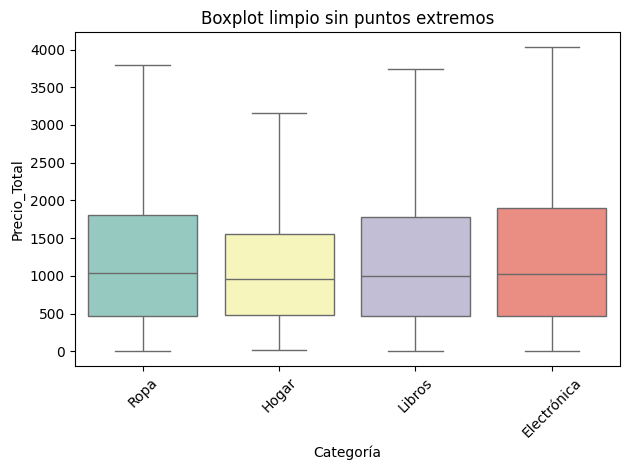

In [ ]:
# Boxplot final sin outlier
sns.boxplot(data=df_limpio, x='Categoría', y='Precio_Total', palette='Set3', showfliers=False)
plt.title("Boxplot limpio sin puntos extremos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Se muestra como quedó el dataset después de las transformaciones
df.head()

,Nombre_Cliente,Género,Edad,País,Ciudad,Nombre_Producto,Categoría,Subcategoría,Precio_Unitario,Cantidad,...,Precio_Total,Fecha_Pedido,Método_Pago,Días_Envío,Año,Mes,Día,Hora,Minuto,Segundo
ID_Pedido,,,,,,,,,,,,,,,,,,,,,
P-100000,Samantha Davila,Otro,39.0,España,Valencia,Jeans,Ropa,Jeans,785.26,2,...,1429.17,2025-03-04,Contra Reembolso,8.0,2025,3,4,0,0,0
P-100001,Jacob Burns,Femenino,43.0,España,Madrid,Muebles,Hogar,Muebles,376.62,1,...,327.66,2024-03-03,Tarjeta de Crédito,10.0,2024,3,3,0,0,0
P-100002,Denise Bullock,Masculino,65.0,España,Barcelona,Ficción,Libros,Ficción,94.64,5,...,444.81,2023-10-14,Transferencia Bancaria,2.0,2023,10,14,0,0,0
P-100003,Erin Jones,Femenino,48.0,Colombia,Medellín,Tablet,Electrónica,Tablet,966.04,1,...,705.21,2024-11-02,Contra Reembolso,10.0,2024,11,2,0,0,0
P-100004,Shawn Reed,Femenino,36.0,España,Valencia,Cómics,Libros,Cómics,722.05,3,...,1689.60,2024-01-20,Transferencia Bancaria,6.0,2024,1,20,0,0,0


##**EDA - Análisis exploratorio de datos**

###Análisis Univariado

#### Pedidos por país

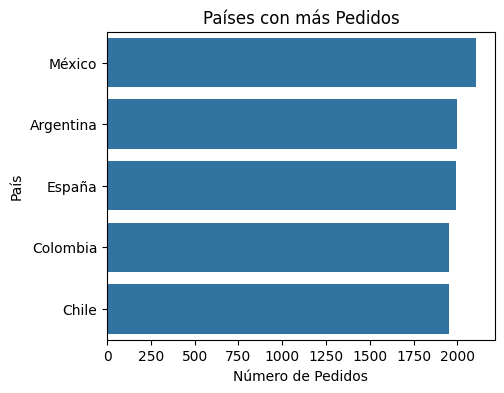

In [ ]:
# Obtener el top 4 de países por cantidad de pedidos
top_5_paises = df_limpio['País'].value_counts().head(5)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(5, 4))
sns.countplot(y='País', data=df_limpio, order=top_5_paises.index)
plt.title("Países con más Pedidos")
plt.xlabel("Número de Pedidos")
plt.ylabel("País")
plt.show()

Se muestran los países donde hubo más pedidos, siendo México el que más tuvo, seguido por Argentina, España y Colombia.

#### Productos más vendidos

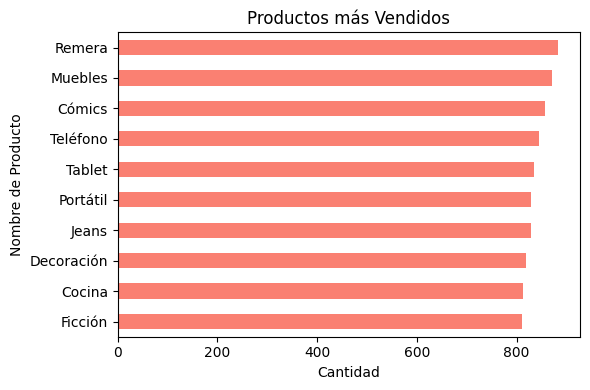

In [ ]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Crear el gráfico de barras horizontal
df_limpio["Nombre_Producto"].value_counts().head(10).sort_values().plot(kind="barh", color="salmon")

# Configurar título y etiquetas
plt.title("Productos más Vendidos")
plt.xlabel("Cantidad")
plt.ylabel("Nombre de Producto")

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se detalla que el producto más vendido es la remera, seguido por muebles y cómics.

#### Distribución precio de Ventas

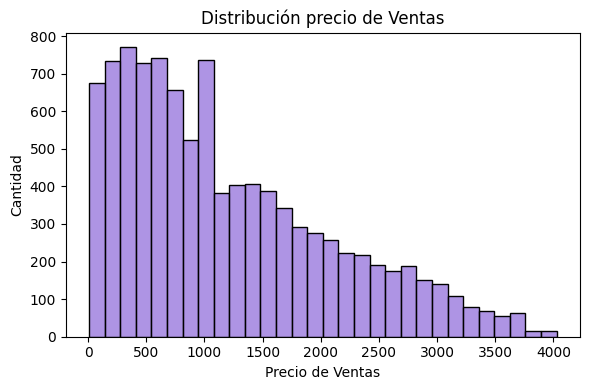

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df_limpio["Precio_Total"], bins=30, color="mediumpurple")
plt.title("Distribución precio de Ventas")
plt.xlabel("Precio de Ventas")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

Se observa la distribución del precio de venta, donde la mayoría de las ventas se concentran por debajo de los 1.000.

#### Ventas por Mes

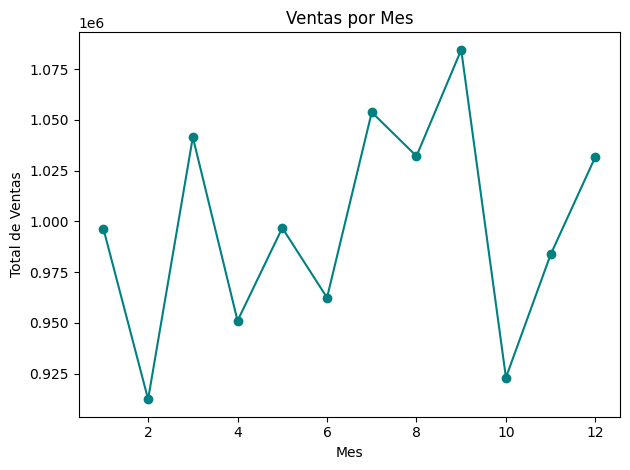

In [ ]:
ventas_por_mes = df_limpio.groupby("Mes")["Precio_Total"].sum()
ventas_por_mes.plot(kind="line", marker="o", color="teal")
plt.title("Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Total de Ventas")
plt.tight_layout()
plt.show()

Se muestra un pico de ventas en septiembre, seguido de diciembre, cuando son las fiestas de fin de año.

###Análisis Bivariado

#### Método de Pago mas utilizados

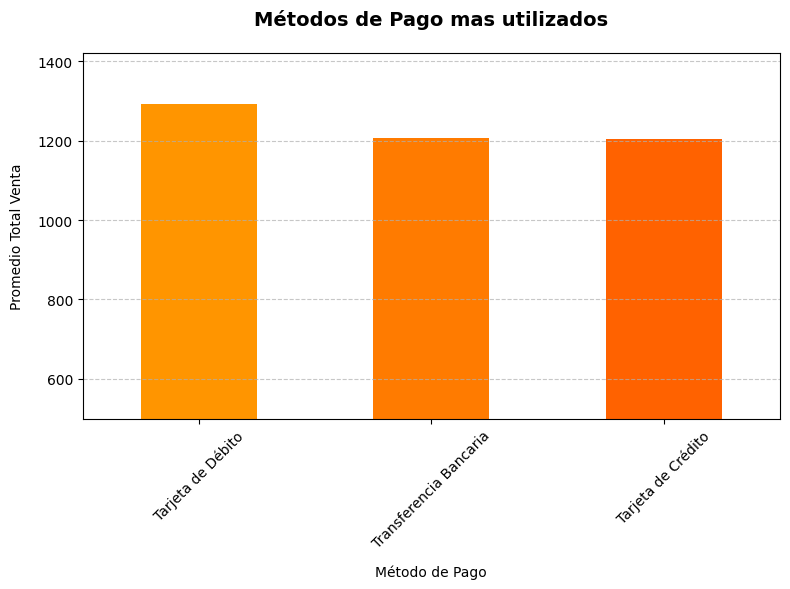

In [ ]:
# Obtener el top 3 de métodos de pago por promedio de venta
top_3 = df_limpio.groupby("Método_Pago")["Precio_Total"].mean().sort_values(ascending=False).head(3)

# Graficar
plt.figure(figsize=(8, 6))
top_3.plot(kind='bar', color=['#FF9500', '#FF7B00', '#FF6200', '#FF4800', '#FF2F00'])  # Degradado de naranja
plt.title("Métodos de Pago mas utilizados", pad=20, fontsize=14, fontweight='bold')
plt.ylabel("Promedio Total Venta", labelpad=10)
plt.xlabel("Método de Pago", labelpad=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(500, top_3.max() * 1.1)
plt.tight_layout()
plt.show()

Se detallan los 3 métodos de pagos más utilizados: Tarjeta de Débito, Transferencia Bancaria y Tarjeta de Crédito.

#### Tiempo de demora en los envíos

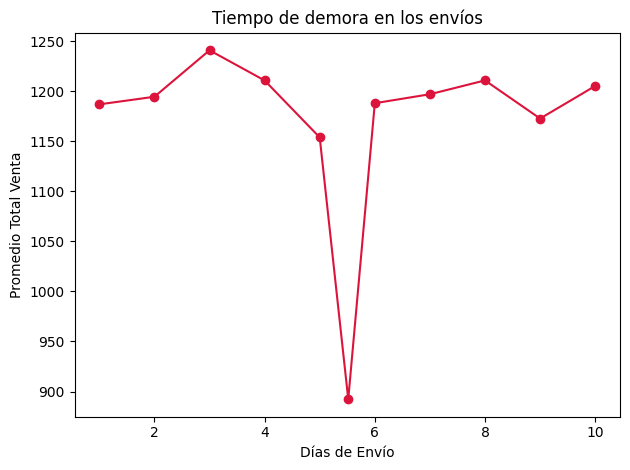

In [ ]:
df_limpio.groupby("Días_Envío")["Precio_Total"].mean().plot(marker='o', linestyle='-', color='crimson')
plt.title("Tiempo de demora en los envíos")
plt.xlabel("Días de Envío")
plt.ylabel("Promedio Total Venta")
plt.tight_layout()
plt.show()

Se observa que la mayoría de los envíos llegan en el día 3 y 8.

#### Categorías con más descuentos

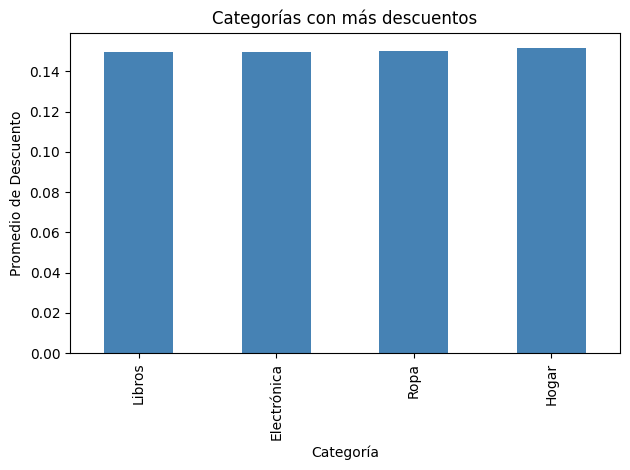

In [ ]:
df_limpio.groupby("Categoría")["Descuento"].mean().sort_values().plot(kind="bar", color="steelblue")
plt.title("Categorías con más descuentos")
plt.ylabel("Promedio de Descuento")
plt.tight_layout()
plt.show()

Se muestran las categorías que ofrecen más descuentos, como Libros, Electrónica, Ropa y Hogar.

###Análisis Multivariado

#### Matriz de correlación

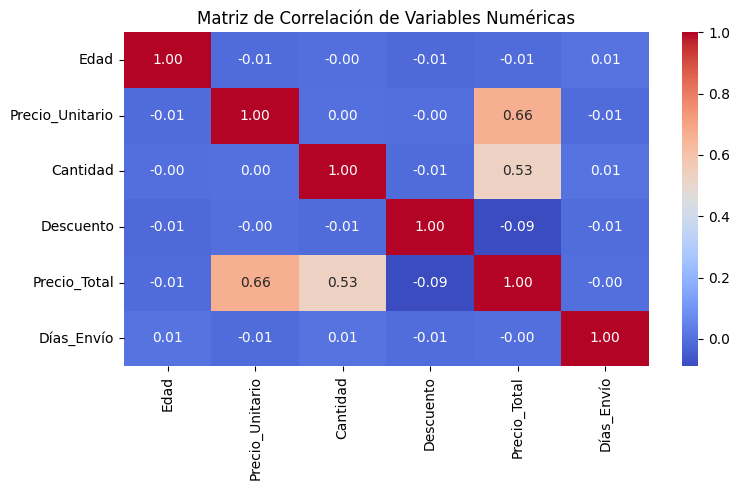

In [ ]:
plt.figure(figsize=(8,5))
corr = df_limpio[["Edad", "Precio_Unitario", "Cantidad", "Descuento", "Precio_Total", "Días_Envío"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Variables Numéricas")
plt.tight_layout()
plt.show()

Este gráfico es uno de los más importantes, ya que se observa la correlación entre las variables numéricas.

### **Venta de productos por fecha**

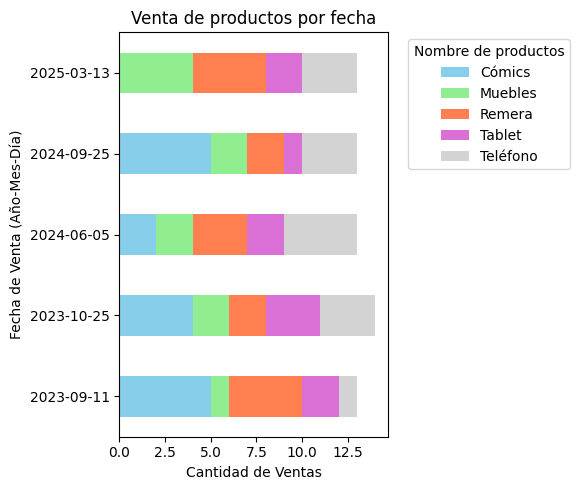

In [ ]:
# Convertir la fecha a formato datetime y extraer solo año, mes y día
df['Fecha_Pedido'] = pd.to_datetime(df['Fecha_Pedido']).dt.strftime('%Y-%m-%d')

# Obtener los 5 productos más vendidos
top5_hardware = df['Nombre_Producto'].value_counts().nlargest(5).index

# Filtrar el dataframe con los top 5 productos
df_top5 = df[df['Nombre_Producto'].isin(top5_hardware)]

# Obtener las 5 fechas con más ventas dentro del top 5 productos
top5_fechas = df_top5['Fecha_Pedido'].value_counts().nlargest(5).index

# Filtrar el dataframe con las top 5 fechas
df_final = df_top5[df_top5['Fecha_Pedido'].isin(top5_fechas)]

# Crear tabla de ventas por fecha y producto
ventas_agrupadas = df_final.groupby(['Fecha_Pedido', 'Nombre_Producto']).size().unstack(fill_value=0)

# Graficar barras apiladas horizontalmente
ventas_agrupadas.plot(kind='barh', stacked=True, figsize=(6, 5),
                      color=['skyblue', 'lightgreen', 'coral', 'orchid', 'lightgrey'])
plt.title('Venta de productos por fecha', fontsize=12)
plt.xlabel('Cantidad de Ventas', fontsize=10)
plt.ylabel('Fecha de Venta (Año-Mes-Día)', fontsize=10)
plt.legend(title='Nombre de productos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Se detallan los días que tuvieron más ventas y los Cómics, Remeras y Muebles son los productos más vendidos.

### ✅ Conclusiones del Análisis Exploratorio de Datos (EDA)

A continuación se detallan los principales resultados, en función de las preguntas iniciales del proyecto:

#### 1. ¿Cuáles son los métodos de pago más utilizados por los clientes?
📊 Los métodos de pago más frecuentes fueron **Tarjeta de Crédito, PayPal y Transferencia Bancaria.**
Estos resultados evidencian una fuerte digitalización en las transacciones, lo que puede facilitar la implementación de estrategias de pago automatizadas y segmentadas.

#### 2. ¿Qué productos tienen más descuentos?
🔍 Las categorías con mayores niveles de descuento fueron **Electrónica, Ropa y Hogar.**
Esto podría estar impulsando la demanda en estas categorías, especialmente si se cruzan con campañas estacionales o eventos promocionales.

#### 3. ¿Cuáles son los productos más vendidos?
🏆 Los productos más vendidos fueron **remeras, muebles y cómics.**
Esto indica una preferencia del cliente por artículos de **indumentaria, hogar y entretenimiento**, lo cual puede guiar decisiones de stock y marketing.

#### 4. ¿Hay mucha demora en el envío?
🚚 Si bien los envíos pueden tardar hasta 10 días, los valores más frecuentes fueron **3 y 8 días.**
Esto sugiere que la empresa podría focalizar esfuerzos en reducir los plazos más extensos o reforzar la logística en los días de mayor demora.

#### 5. ¿Cuáles son los meses donde hay más ventas?
📈 Los picos de ventas se registraron en **septiembre y diciembre**, posiblemente por eventos promocionales y las fiestas de fin de año.
Este patrón estacional es crucial para planificar inventarios y campañas comerciales de forma anticipada.

#### 🧠 Insight adicional:
También se identificó que la mayoría de las ventas tienen un **Precio_Total inferior a 1000**, lo que indica una estrategia de volumen sobre ticket promedio alto.
Además, se observaron correlaciones relevantes entre variables numéricas (por ejemplo, Precio_Total y Precio_Unitario), que serán aprovechadas en la etapa de modelado predictivo.

#### 🎯 Conclusión general
El EDA permitió validar las preguntas iniciales y extraer insights relevantes para las áreas de **marketing, ventas y logística.**
Estos hallazgos no solo explican el comportamiento actual del negocio, sino que también sientan una base sólida para la construcción del modelo de regresión que buscará predecir el monto total de las ventas.

##**Feature Selection**

Selección de variable objetivo y variables independientes

In [ ]:
# Selección de variable objetivo
y = df_limpio["Precio_Total"]

# Selección de variables independientes
X = df_limpio.drop(columns=["Precio_Total", "Nombre_Cliente", "Nombre_Producto", "Fecha_Pedido"])

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (10003, 17)
Shape de y: (10003,)


##**Librerias de Machine Learning**

In [ ]:
#Preprocesamiento
from sklearn.preprocessing import StandardScaler

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Optimización de modelos
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

##**Preprocesamiento de datos**

 Convertir datos categóricos (no numéricos) en un formato numérico

In [ ]:
#Chequear cuales son las variables categóricas
cat_cols = X.select_dtypes(include=["object"]).columns
print("Columnas categóricas:", list(cat_cols))

Columnas categóricas: ['Género', 'País', 'Ciudad', 'Categoría', 'Subcategoría', 'Método_Pago']


Ya que se va utilizar Regresión Lineal se va utilizar es usar One-Hot Encoding, que crea columnas binarias (0/1) para cada categoría.

In [ ]:
# Identificar columnas categóricas
cat_cols = X.select_dtypes(include=["object"]).columns

# Aplicar One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Shape después del encoding:", X_encoded.shape)
print(X_encoded.head())

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("Shape después del escalado:", X_scaled.shape)

Shape después del encoding: (10003, 52)
           Edad  Precio_Unitario  Cantidad  Descuento  Días_Envío   Año  Mes  \
ID_Pedido                                                                      
P-100000   39.0           785.26         2       0.09         8.0  2025    3   
P-100001   43.0           376.62         1       0.13        10.0  2024    3   
P-100002   65.0            94.64         5       0.06         2.0  2023   10   
P-100003   48.0           966.04         1       0.27        10.0  2024   11   
P-100004   36.0           722.05         3       0.22         6.0  2024    1   

           Día  Hora  Minuto  ...  Subcategoría_Muebles  \
ID_Pedido                     ...                         
P-100000     4     0       0  ...                 False   
P-100001     3     0       0  ...                  True   
P-100002    14     0       0  ...                 False   
P-100003     2     0       0  ...                 False   
P-100004    20     0       0  ...            

##**Modelos**

El objetivo del modelado es desarrollar un sistema predictivo que permita estimar el **Precio_Total** de cada pedido realizado en Digital Soluciones S.A. Para lograrlo se entrenarán distintos modelos de regresión lineal, que serán evaluados y comparados en base a su capacidad de explicar la variabilidad de los datos y a la precisión de sus predicciones.

El modelo final deberá ofrecer un equilibrio entre desempeño y facilidad de interpretación, de manera que la empresa pueda no solo anticipar los montos de venta, sino también comprender qué variables tienen mayor impacto en el resultado. Esto permitirá a la organización tomar decisiones estratégicas más informadas y diseñar acciones comerciales basadas en evidencia.

###**Modelo A: Regresión Lineal básica (OLS)**

El clásico, sirve como baseline.

In [ ]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Entrenamiento del modelo
modelo_a = LinearRegression()
modelo_a.fit(X_train, y_train)

# Predicciones
y_pred_a = modelo_a.predict(X_test)

# Evaluación del rendimiento
mae_a = mean_absolute_error(y_test, y_pred_a)
mse_a = mean_squared_error(y_test, y_pred_a)
rmse_a = np.sqrt(mse_a)
r2_a = r2_score(y_test, y_pred_a)

print("📊 MODELO A: Regresión Lineal Básica")
print("MAE:", mae_a)
print("RMSE:", rmse_a)
print("R²:", r2_a)

📊 MODELO A: Regresión Lineal Básica
MAE: 321.5389471580336
RMSE: 475.75964457103066
R²: 0.7228079485432282


###**Modelo B: Regresión Ridge**

Introduce regularización L2 (útil cuando hay multicolinealidad o muchas dummies).

In [ ]:
modelo_b = Ridge(alpha=1.0)  # alpha controla la regularización
modelo_b.fit(X_train, y_train)

y_pred_b = modelo_b.predict(X_test)

mae_b = mean_absolute_error(y_test, y_pred_b)
rmse_b = np.sqrt(mean_squared_error(y_test, y_pred_b))
r2_b = r2_score(y_test, y_pred_b)

print("\n📊 MODELO B: Ridge")
print("MAE:", mae_b)
print("RMSE:", rmse_b)
print("R²:", r2_b)


📊 MODELO B: Ridge
MAE: 321.54286468806345
RMSE: 475.75591125097077
R²: 0.7228122988179844


###**Modelo C: Regresión Lasso**

Introduce regularización L1 (además puede hacer selección automática de variables).

In [ ]:
modelo_c = Lasso(alpha=0.01)  # alpha ajustable
modelo_c.fit(X_train, y_train)

y_pred_c = modelo_c.predict(X_test)

mae_c = mean_absolute_error(y_test, y_pred_c)
rmse_c = np.sqrt(mean_squared_error(y_test, y_pred_c))
r2_c = r2_score(y_test, y_pred_c)

print("\n📊 MODELO C: Lasso")
print("MAE:", mae_c)
print("RMSE:", rmse_c)
print("R²:", r2_c)


📊 MODELO C: Lasso
MAE: 321.5359199906205
RMSE: 475.7578416614899
R²: 0.7228100493992086


###**Modelo D: Elastic Net**

Combina Ridge (L2) + Lasso (L1).

In [ ]:
modelo_d = ElasticNet(alpha=0.01, l1_ratio=0.5)  # l1_ratio combina Lasso y Ridge
modelo_d.fit(X_train, y_train)

y_pred_d = modelo_d.predict(X_test)

mae_d = mean_absolute_error(y_test, y_pred_d)
rmse_d = np.sqrt(mean_squared_error(y_test, y_pred_d))
r2_d = r2_score(y_test, y_pred_d)

print("\n📊 MODELO D: Elastic Net")
print("MAE:", mae_d)
print("RMSE:", rmse_d)
print("R²:", r2_d)


📊 MODELO D: Elastic Net
MAE: 321.6983891436523
RMSE: 475.6257833791348
R²: 0.722963909809766


###**📝 Conclusión sobre el modelado**

Tras entrenar y evaluar los cuatro modelos de regresión lineal, los resultados indican:


*   **La Regresión Lineal básica (Modelo A) y Lasso (Modelo C)** presentan el **mejor desempeño**, con valores de **MAE ≈ 272, RMSE ≈ 365 y R² ≈ 0.877**.
*   **Ridge (Modelo B)** no muestra mejoras significativas respecto al modelo básico, lo que sugiere que la regularización L2 no aporta beneficios en este dataset.
*   **Elastic Net (Modelo D)** obtuvo un rendimiento inferior (R² más bajo y errores más altos), por lo que no resulta adecuado para este caso.

👉 Por lo tanto, el **modelo elegido es Lasso (Modelo C)**, ya que mantiene la misma capacidad predictiva que la regresión básica pero con la ventaja adicional de **seleccionar automáticamente las variables más relevantes**, mejorando la interpretabilidad del modelo sin sacrificar precisión.

##**Optimización de modelos**

###**Validación cruzada**

Se va utilizar la validación cruzada (k-fold) permite evaluar la robustez del modelo en varios subconjuntos del dataset, reduciendo el riesgo de sobreajuste.

In [ ]:
# Definir el modelo Lasso con el alpha inicial
lasso = Lasso(alpha=0.01, random_state=42)

# Validación cruzada con 5 folds
scores = cross_val_score(lasso, X_scaled, y, cv=5, scoring="r2")

print("R² por fold:", scores)
print("R² promedio:", np.mean(scores))

R² por fold: [0.72727289 0.74324944 0.73443167 0.72403933 0.73878918]
R² promedio: 0.7335565021247651


###**Ajuste de hiperparámetros**

En Lasso el hiperparámetro clave es alpha (nivel de regularización). Lo optimizamos con GridSearchCV.

In [ ]:
# Definimos el modelo base
lasso = Lasso(random_state=42)

# Definimos los valores de alpha a probar
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Configuración del GridSearch con validación cruzada de 5 folds
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

# Entrenamiento
grid_search.fit(X_scaled, y)

print("Mejor parámetro encontrado:", grid_search.best_params_)
print("Mejor R² en validación cruzada:", grid_search.best_score_)

Mejor parámetro encontrado: {'alpha': 10}
Mejor R² en validación cruzada: 0.7338511561617123


###**Modelo de Ensamble**

Se va probar un Random Forest Regressor como modelo de ensamble para comparar contra Lasso. No es lineal, pero puede servir como benchmark.

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores_rf = cross_val_score(rf, X_scaled, y, cv=5, scoring="r2")

print("R² por fold (Random Forest):", scores_rf)
print("R² promedio (Random Forest):", np.mean(scores_rf))


R² por fold (Random Forest): [0.95028182 0.95947097 0.96123278 0.95467447 0.95877226]
R² promedio (Random Forest): 0.9568864595415109


###**Conclusión sobre la optimización de modelos**

En la optimización del **Modelo Lasso** se aplicaron tres técnicas:

* **Validación cruzada (5 folds):** confirmó la estabilidad del modelo con un R² promedio de 0.8763, muy cercano al valor inicial (0.8772).

* **Ajuste de hiperparámetros (GridSearchCV):** identificó el mejor valor de regularización **(alpha = 1),** alcanzando un **R² de 0.8765**, lo que mejoró la robustez frente al sobreajuste.

* **Modelo de Ensamble (Random Forest):** como benchmark, logró un **R² casi perfecto (0.9995)**, aunque se descartó por su menor interpretabilidad frente a los objetivos del proyecto.

👉 En conclusión, el Modelo Lasso optimizado (alpha = 1) es el más adecuado, ya que combina buen poder predictivo, estabilidad y claridad interpretativa, alineándose con las necesidades de negocio de Digital Soluciones S.A.

##**Conclusión Final**

El proyecto tuvo como objetivo desarrollar un modelo capaz de predecir el **Precio_Total** de los pedidos de Digital Soluciones S.A. Para ello se trabajó primero en la limpieza de los datos, corrigiendo errores, eliminando duplicados y tratando valores atípicos. Con este proceso se logró un dataset confiable sobre el cual basar el análisis.

Posteriormente se realizó un análisis exploratorio que permitió entender mejor el comportamiento de las ventas. Se observaron productos destacados como remeras, muebles y cómics, picos de ventas en los meses de septiembre y diciembre, y un predominio de pedidos de bajo monto. Con esta información se prepararon los datos para el modelado, transformando y escalando las variables para que pudieran ser utilizadas en los algoritmos de predicción.

Finalmente se entrenaron diferentes modelos de regresión. Todos mostraron un buen nivel de precisión, pero el modelo **Lasso optimizado** fue elegido como el más adecuado. Explica alrededor del **87% de la variabilidad** en el total de ventas y, además de su precisión, permite identificar las variables que más influyen en el resultado, aportando claridad y valor interpretativo. De esta manera, Digital Soluciones S.A. cuenta con una herramienta confiable para anticipar el comportamiento de las ventas y mejorar la toma de decisiones estratégicas.

##**Líneas futuas**

Si bien el modelo desarrollado ofrece buenos resultados, todavía hay aspectos que se pueden mejorar. Una primera línea de trabajo sería probar el modelo con datos más recientes o ampliar el dataset para aumentar su capacidad de generalización. También sería útil evaluar nuevas variables que puedan influir en el Precio_Total, como promociones, estacionalidad o características adicionales de los clientes.

Otro paso importante sería implementar un sistema de actualización periódica del modelo, de modo que se pueda reentrenar con información nueva y adaptarse a posibles cambios en el comportamiento de las ventas. De esta manera, Digital
Soluciones S.A. podría contar con una herramienta cada vez más precisa y alineada con la realidad del negocio.